In [1]:
import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

from evaluation.deviations_evalaution_metrics import load_results, DeviationEvaluation

In [2]:
# Load deviation prediction results:
path_pred_deviations = "../../../results/Helpdesk/predictions/deviation_predictions.pkl"

# Evaluation deviation labels

In [7]:
deviation_results_evaluation = load_results(path=path_pred_deviations)
eval = DeviationEvaluation(deviation_results=deviation_results_evaluation)

In [4]:
# Only evaluate labels that are in the target set!
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_dev()
print("Precision macro dev: ", precision_macro)
print("Precision macro dev per label: ", precision_per_label)
print("Recall macro dev: ", recall_macro)
print("Recall macro dev per label: ", recall_per_label)

Precision macro dev:  0.09565197964302201
Precision macro dev per label:  {('>>', 'Assign seriousness'): 0.14285714285714285, ('Create SW anomaly', '>>'): 0.0, ('Require upgrade', '>>'): 0.02661290322580645, ('Resolve ticket', '>>'): 0.08074534161490683, ('Take in charge ticket', '>>'): 0.13082437275985664, ('Wait', '>>'): 0.1928721174004193}
Recall macro dev:  0.3965899168148057
Recall macro dev per label:  {('>>', 'Assign seriousness'): 0.42857142857142855, ('Create SW anomaly', '>>'): 0.0, ('Require upgrade', '>>'): 0.7021276595744681, ('Resolve ticket', '>>'): 0.22608695652173913, ('Take in charge ticket', '>>'): 0.6517857142857143, ('Wait', '>>'): 0.3709677419354839}


In [5]:
precision_macro, recall_macro, precision_per_label, recall_per_label = eval.precision_recall_macro_by_label_no_dev()
print("Precision macro no dev: ", precision_macro)
print("Precision macro per label no dev: ", precision_per_label)
print("Recall macro no dev: ", recall_macro)
print("Recall macro per label no dev: ", recall_per_label)

Precision macro no dev:  0.9803348339420138
Precision macro per label no dev:  {('>>', 'Assign seriousness'): 0.998414585810543, ('Create SW anomaly', '>>'): 0.9972178060413355, ('Require upgrade', '>>'): 0.9938650306748467, ('Resolve ticket', '>>'): 0.9653465346534653, ('Take in charge ticket', '>>'): 0.9808660624370594, ('Wait', '>>'): 0.9462989840348331}
Recall macro no dev:  0.835763871296824
Recall macro per label no dev:  {('>>', 'Assign seriousness'): 0.9929050059124951, ('Create SW anomaly', '>>'): 0.9889633425305479, ('Require upgrade', '>>'): 0.5177786656012785, ('Resolve ticket', '>>'): 0.8787382220401475, ('Take in charge ticket', '>>'): 0.8006576243321003, ('Wait', '>>'): 0.8355403673643742}


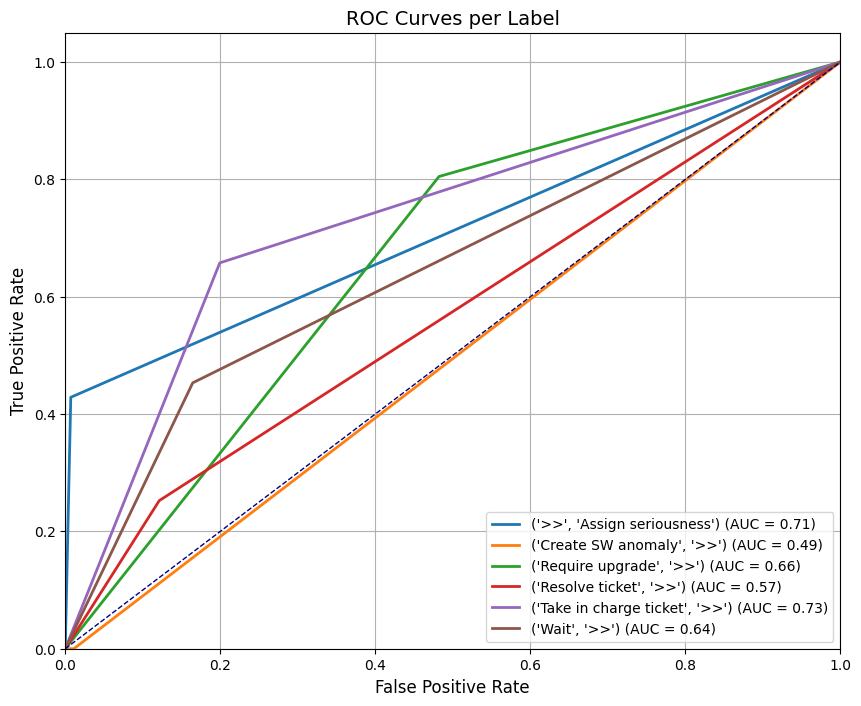

ROC_AUC macro dev:  0.6342766264749905
ROC_AUC macro dev per label:  {('>>', 'Assign seriousness'): 0.7107382172419618, ('Create SW anomaly', '>>'): 0.4944816712652739, ('Require upgrade', '>>'): 0.6613283571908831, ('Resolve ticket', '>>'): 0.5655827032530835, ('Take in charge ticket', '>>'): 0.729157640994879, ('Wait', '>>'): 0.6443711689038619}


In [6]:
roc_auc_macro, roc_auc_per_label = eval.roc_auc_macro_by_label()
print("ROC_AUC macro dev: ", roc_auc_macro)
print("ROC_AUC macro dev per label: ", roc_auc_per_label)

# Evaluation sequences

# Evaluation unseen deviation labels